# pandas基本介绍

## numpy相当于列表操作，pandas相当于字典操作

In [101]:
import numpy as np
import pandas as pd

In [102]:
s = pd.Series([1,3,4,np.nan,44,1])
s

0     1.0
1     3.0
2     4.0
3     NaN
4    44.0
5     1.0
dtype: float64

In [103]:
dates = pd.date_range('20180101',periods = 6)

#### DataFrame 数据框

In [104]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=['a','b','c','d'])
df    

,a,b,c,d
2018-01-01,2.289192,0.390700,-0.759240,0.812082
2018-01-02,-1.075224,-0.425900,1.120334,1.014666
2018-01-03,-1.135078,-0.201357,-0.685106,0.100308
2018-01-04,0.122615,-2.117713,-0.153857,-0.048558
2018-01-05,1.118029,-0.229835,-1.071975,-0.365708
2018-01-06,1.691823,0.350177,3.009965,0.150075


In [105]:
df1 = pd.DataFrame(np.arange(12).reshape((3,4)))

In [106]:
df1

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


In [107]:
df2 = pd.DataFrame({"A":1.,
                    'B':pd.Timestamp('20130102'),
                    'C':pd.Series(1,index = list(range(4)),dtype = 'float32'), # 产生了index横坐标
                    'D':np.array([3]*4,dtype = 'int32'),
                    'E':pd.Categorical(['test','train','test','train']),
                    'F':'foo'
                   })   # 列数据

In [108]:
print(df2)
df2.dtypes

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [109]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [110]:
df2.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [111]:
df2.columns

Index(['A', 'B', 'C', 'D', 'E', 'F'], dtype='object')

In [112]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [113]:
df2.describe()    # std 方差

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [114]:
df2.T   # 转置

,0,1,2,3
A,1,1,1,1
B,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00,2013-01-02 00:00:00
C,1,1,1,1
D,3,3,3,3
E,test,train,test,train
F,foo,foo,foo,foo


In [115]:
df2.sort_index(axis = 1,ascending = False)  # 列序

,F,E,D,C,B,A
0,foo,test,3,1.0,2013-01-02,1.0
1,foo,train,3,1.0,2013-01-02,1.0
2,foo,test,3,1.0,2013-01-02,1.0
3,foo,train,3,1.0,2013-01-02,1.0


In [116]:
df2.sort_index(axis = 0,ascending = False) 

,A,B,C,D,E,F
3,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
0,1.0,2013-01-02,1.0,3,test,foo


In [117]:
df2.sort_values(by='E')

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
2,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
3,1.0,2013-01-02,1.0,3,train,foo


## 选择数据

In [130]:
import pandas as pd
import numpy as np

dates = pd.date_range('20180201',periods = 6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index = dates,columns = ['A','B','C','D'])

In [133]:
df

,A,B,C,D
2018-02-01,0,1,2,3
2018-02-02,4,5,6,7
2018-02-03,8,9,10,11
2018-02-04,12,13,14,15
2018-02-05,16,17,18,19
2018-02-06,20,21,22,23


In [134]:
print(df['A'],df.A)
print(df[0:3],df['20180202':'20180206'])

2018-02-01     0
2018-02-02     4
2018-02-03     8
2018-02-04    12
2018-02-05    16
2018-02-06    20
Freq: D, Name: A, dtype: int32 2018-02-01     0
2018-02-02     4
2018-02-03     8
2018-02-04    12
2018-02-05    16
2018-02-06    20
Freq: D, Name: A, dtype: int32
            A  B   C   D
2018-02-01  0  1   2   3
2018-02-02  4  5   6   7
2018-02-03  8  9  10  11              A   B   C   D
2018-02-02   4   5   6   7
2018-02-03   8   9  10  11
2018-02-04  12  13  14  15
2018-02-05  16  17  18  19
2018-02-06  20  21  22  23


## select by label :loc   标签定位

In [135]:
print(df.loc['20180202'])

A    4
B    5
C    6
D    7
Name: 2018-02-02 00:00:00, dtype: int32


In [136]:
print(df.loc[:,['A','B']])   # 选行，选列

             A   B
2018-02-01   0   1
2018-02-02   4   5
2018-02-03   8   9
2018-02-04  12  13
2018-02-05  16  17
2018-02-06  20  21


In [137]:
print(df.loc['20180202',['A','B']])

A    4
B    5
Name: 2018-02-02 00:00:00, dtype: int32


## select by position:iloc    位置定位

In [138]:
print(df.iloc[3]) # 第三行的数据

A    12
B    13
C    14
D    15
Name: 2018-02-04 00:00:00, dtype: int32


In [139]:
print(df.iloc[3,1])

13


In [140]:
print(df.iloc[3:5,1:3])

             B   C
2018-02-04  13  14
2018-02-05  17  18


In [141]:
print(df.iloc[[1,3,5],1:3])  # 1,3,5行，2，3列

             B   C
2018-02-02   5   6
2018-02-04  13  14
2018-02-06  21  22


## mixed selection:ix   混合定位

In [143]:
print(df.ix[:3,['A','C']])

            A   C
2018-02-01  0   2
2018-02-02  4   6
2018-02-03  8  10


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


## Boolean indexing   

In [100]:
print(df)
print(df[df.A>8])
print(df[df.A<8])

             A   B   C   D
2018-02-01   0   1   2   3
2018-02-02   4   5   6   7
2018-02-03   8   9  10  11
2018-02-04  12  13  14  15
2018-02-05  16  17  18  19
2018-02-06  20  21  22  23
             A   B   C   D
2018-02-04  12  13  14  15
2018-02-05  16  17  18  19
2018-02-06  20  21  22  23
            A  B  C  D
2018-02-01  0  1  2  3
2018-02-02  4  5  6  7


## 设置值

In [171]:
import pandas as pd
import numpy as np

dates = pd.date_range('20180201',periods = 6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index = dates,columns = ['A','B','C','D'])

In [145]:
df.iloc[2,2] = 1111   # 位置定位

In [147]:
df

,A,B,C,D
2018-02-01,0,1,2,3
2018-02-02,4,5,6,7
2018-02-03,8,9,1111,11
2018-02-04,12,13,14,15
2018-02-05,16,17,18,19
2018-02-06,20,21,22,23


In [148]:
df.loc['20180201','B'] = 222

In [150]:
df

,A,B,C,D
2018-02-01,0,222,2,3
2018-02-02,4,5,6,7
2018-02-03,8,9,1111,11
2018-02-04,12,13,14,15
2018-02-05,16,17,18,19
2018-02-06,20,21,22,23


In [153]:
df[df.A>4] = 0
df

,A,B,C,D
2018-02-01,0,222,2,3
2018-02-02,4,5,6,7
2018-02-03,0,0,0,0
2018-02-04,0,0,0,0
2018-02-05,0,0,0,0
2018-02-06,0,0,0,0


In [160]:
df.A[df.A>4] = 0
df

,A,B,C,D
2018-02-01,0,1,2,3
2018-02-02,4,5,6,7
2018-02-03,0,9,10,11
2018-02-04,0,13,14,15
2018-02-05,0,17,18,19
2018-02-06,0,21,22,23


In [162]:
df['F'] = np.nan   # df['标签']
df

,A,B,C,D,F
2018-02-01,0,1,2,3,NaN
2018-02-02,4,5,6,7,NaN
2018-02-03,0,9,10,11,NaN
2018-02-04,0,13,14,15,NaN
2018-02-05,0,17,18,19,NaN
2018-02-06,0,21,22,23,NaN


In [173]:
df['E'] = pd.Series([1,2,3,4,5,6],index = pd.date_range('20130101',periods = 6) )

In [175]:
df

,A,B,C,D,E
2018-02-01,0,1,2,3,NaN
2018-02-02,4,5,6,7,NaN
2018-02-03,8,9,10,11,NaN
2018-02-04,12,13,14,15,NaN
2018-02-05,16,17,18,19,NaN
2018-02-06,20,21,22,23,NaN


## 处理丢失数据

In [184]:
import pandas as pd
import numpy as np

dates = pd.date_range('20180201',periods = 6)
df = pd.DataFrame(np.arange(24).reshape((6,4)),index = dates,columns = ['A','B','C','D'])

In [185]:
df.iloc[0,1] = np.nan
df.iloc[1,2] = np.nan

In [181]:
df

,A,B,C,D
2018-02-01,0,NaN,2.0,3
2018-02-02,4,5.0,NaN,7
2018-02-03,8,9.0,10.0,11
2018-02-04,12,13.0,14.0,15
2018-02-05,16,17.0,18.0,19
2018-02-06,20,21.0,22.0,23


In [182]:
print(df.dropna(axis = 0,how = 'any'))   # 0丢掉行   # how={'any','all'}


             A     B     C   D
2018-02-03   8   9.0  10.0  11
2018-02-04  12  13.0  14.0  15
2018-02-05  16  17.0  18.0  19
2018-02-06  20  21.0  22.0  23


In [186]:
print(df.dropna(axis = 1,how = 'any'))   # 1丢掉列   # how={'any','all'}

             A   D
2018-02-01   0   3
2018-02-02   4   7
2018-02-03   8  11
2018-02-04  12  15
2018-02-05  16  19
2018-02-06  20  23


In [187]:
print(df.fillna(value=0))  # 填充

             A     B     C   D
2018-02-01   0   0.0   2.0   3
2018-02-02   4   5.0   0.0   7
2018-02-03   8   9.0  10.0  11
2018-02-04  12  13.0  14.0  15
2018-02-05  16  17.0  18.0  19
2018-02-06  20  21.0  22.0  23


In [195]:
print(df.isnull())

                A      B      C      D
2018-02-01  False   True  False  False
2018-02-02  False  False   True  False
2018-02-03  False  False  False  False
2018-02-04  False  False  False  False
2018-02-05  False  False  False  False
2018-02-06  False  False  False  False


In [191]:
print(np.any(df.isnull()) == True)   # 至少有一个NoN 检查

True


## 导入导出

In [192]:
# read_csv   可以读取格式excel,hdf,sql,json,msgpack,heml,gbq,stata,sas,clipboard,pickle

In [193]:
# to_csv  csv,excel,hdf,sql,json等保存格式

In [205]:
import pandas as pd
data = pd.read_csv('tongji.csv')
data = data.fillna(value=0)
data.to_pickle('tongji.pickle')

## 合并concat

In [206]:
import pandas as pd
import numpy as np

In [207]:
# concatenating

In [221]:
df1 = pd.DataFrame(np.ones((3,4))*0,columns = ['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1,columns = ['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2,columns = ['a','b','c','d'])
print(df1)
print(df2)
print(df3)

     a    b    c    d
0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
     a    b    c    d
0  1.0  1.0  1.0  1.0
1  1.0  1.0  1.0  1.0
2  1.0  1.0  1.0  1.0
     a    b    c    d
0  2.0  2.0  2.0  2.0
1  2.0  2.0  2.0  2.0
2  2.0  2.0  2.0  2.0


In [222]:
#上下合并

In [224]:
res=pd.concat([df1,df2,df3],axis=0)  #0竖向（行），1横向（列）
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


In [226]:
res=pd.concat([df1,df2,df3],axis=0,ignore_index = True)  #0竖向（行），1横向（列）
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


### join,['inner','outer']

In [229]:
df1 = pd.DataFrame(np.ones((3,4))*0,columns = ['a','b','c','d'],index=[1,2,3])
df2 = pd.DataFrame(np.ones((3,4))*1,columns = ['b','c','d','e'],index=[2,3,4])
print(df1)
print(df2)

     a    b    c    d
1  0.0  0.0  0.0  0.0
2  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  0.0
     b    c    d    e
2  1.0  1.0  1.0  1.0
3  1.0  1.0  1.0  1.0
4  1.0  1.0  1.0  1.0


In [234]:
res=pd.concat([df1,df2],join='outer') 
res

,a,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
3,0.0,0.0,0.0,0.0,NaN
2,NaN,1.0,1.0,1.0,1.0
3,NaN,1.0,1.0,1.0,1.0
4,NaN,1.0,1.0,1.0,1.0


In [235]:
res=pd.concat([df1,df2],join='inner')     # 裁剪掉
res

,b,c,d
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [239]:
res=pd.concat([df1,df2],join='inner',ignore_index = True)     # 裁剪掉
res

,b,c,d
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0
5,1.0,1.0,1.0


In [241]:
res=pd.concat([df1,df2],axis =1,join_axes=[df1.index])     # 左右合并，索引按df1进行合并
res

,a,b,c,d,b,c,d,e
1,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0


In [250]:
df1 = pd.DataFrame(np.ones((3,4))*0,columns = ['a','b','c','d'])
df2 = pd.DataFrame(np.ones((3,4))*1,columns = ['a','b','c','d'])
df3 = pd.DataFrame(np.ones((3,4))*2,columns = ['b','c','d','e'],index = [2,3,4])
df4 = pd.DataFrame(np.ones((3,4))*3,columns = ['a','b','c','d'])

In [246]:
res = df1.append(df2,ignore_index=True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0


In [253]:
res = df1.append([df2,df4],ignore_index=True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,3.0,3.0,3.0,3.0
7,3.0,3.0,3.0,3.0
8,3.0,3.0,3.0,3.0


In [255]:
s1=pd.Series([1,2,3,4],index = ['a','b','c','d'])
res = df1.append(s1,ignore_index = True)
res

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,2.0,3.0,4.0


## 合并merge

In [257]:
import pandas as pd

## mering two fdf key/keys.(may be used in database)

In [258]:
left = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'A':['A0','A1','A2','A3'],
                    'B':['B0','B1','B2','B3']})
right = pd.DataFrame({'key':['K0','K1','K2','K3'],
                    'C':['C0','C1','C2','C3'],
                    'D':['D0','D1','D2','D3']})

In [259]:
print(left)
print(right)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3
    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K3


In [261]:
res = pd.merge(left,right,on='key')     # 相当于inner 相同的合并
res

,A,B,key,C,D
0,A0,B0,K0,C0,D0
1,A1,B1,K1,C1,D1
2,A2,B2,K2,C2,D2
3,A3,B3,K3,C3,D3


## condier two keys

In [286]:
left = pd.DataFrame({'key1':['K0','K0','K1','K2'],
                     'key2':['K0','K1','K0','K1'],
                      'A':['A0','A1','A2','A3'],
                      'B':['B0','B1','B2','B3']})
right = pd.DataFrame({'key1':['K0','K1','K2','K3'],
                      'key2':['K0','K0','K0','K0'],
                      'C':['C0','C1','C2','C3'],
                      'D':['D0','D1','D2','D3']})

In [287]:
print(left)
print(right)

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K2   K0
3  C3  D3   K3   K0


In [288]:
res = pd.merge(left,right,on = ['key1','key2'])
res

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1


#### how = ['left','right','outer','inner']

In [289]:
res = pd.merge(left,right,on = ['key1','key2'],how = 'inner')
res

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1


In [290]:
res = pd.merge(left,right,on = ['key1','key2'],how = 'outer')
res   # outer 强制合并，有没有都要合并，没有用nan代替

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,NaN,NaN
4,NaN,NaN,K2,K0,C2,D2
5,NaN,NaN,K3,K0,C3,D3


In [291]:
print(left)
print(right)
res = pd.merge(left,right,on = ['key1','key2'],how = 'left')
res

    A   B key1 key2
0  A0  B0   K0   K0
1  A1  B1   K0   K1
2  A2  B2   K1   K0
3  A3  B3   K2   K1
    C   D key1 key2
0  C0  D0   K0   K0
1  C1  D1   K1   K0
2  C2  D2   K2   K0
3  C3  D3   K3   K0


,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A1,B1,K0,K1,NaN,NaN
2,A2,B2,K1,K0,C1,D1
3,A3,B3,K2,K1,NaN,NaN


In [292]:
res = pd.merge(left,right,on = ['key1','key2'],how = 'right')
res

,A,B,key1,key2,C,D
0,A0,B0,K0,K0,C0,D0
1,A2,B2,K1,K0,C1,D1
2,NaN,NaN,K2,K0,C2,D2
3,NaN,NaN,K3,K0,C3,D3


#### indicator

In [275]:
df1 = pd.DataFrame({'col1':[0,1], 'col_left':['a','b']})
df2 = pd.DataFrame({'col1':[1,2,2],'col_right':[2,2,2]})
print(df1)
print(df2)
# 依据col1进行合并，并启用indicator=True，最后打印出
res = pd.merge(df1, df2, on='col1', how='outer', indicator=True)
print(res)

   col1 col_left
0     0        a
1     1        b
   col1  col_right
0     1          2
1     2          2
2     2          2
   col1 col_left  col_right      _merge
0     0        a        NaN   left_only
1     1        b        2.0        both
2     2      NaN        2.0  right_only
3     2      NaN        2.0  right_only


#### 自定indicator column的名称，并打印出

In [278]:

res = pd.merge(df1, df2, on='col1', how='outer', indicator='indicator_column')
print(res)

   col1 col_left  col_right indicator_column
0     0        a        NaN        left_only
1     1        b        2.0             both
2     2      NaN        2.0       right_only
3     2      NaN        2.0       right_only


#### 依据index合并

In [279]:
left = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                     index=['K0', 'K1', 'K2'])
right = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                      'D': ['D0', 'D2', 'D3']},
                     index=['K0', 'K2', 'K3'])
print(left)
print(right)

     A   B
K0  A0  B0
K1  A1  B1
K2  A2  B2
     C   D
K0  C0  D0
K2  C2  D2
K3  C3  D3


#### 依据左右资料集的index进行合并，how='outer',并打印出

In [280]:

res = pd.merge(left, right, left_index=True, right_index=True, how='outer')
print(res)

      A    B    C    D
K0   A0   B0   C0   D0
K1   A1   B1  NaN  NaN
K2   A2   B2   C2   D2
K3  NaN  NaN   C3   D3


#### 依据左右资料集的index进行合并，how='inner',并打印出

In [282]:

res = pd.merge(left, right, left_index=True, right_index=True, how='inner')
print(res)

     A   B   C   D
K0  A0  B0  C0  D0
K2  A2  B2  C2  D2


####  解决overlapping的问题

In [293]:
#定义资料集
boys = pd.DataFrame({'k': ['K0', 'K1', 'K2'], 'age': [1, 2, 3]})
girls = pd.DataFrame({'k': ['K0', 'K0', 'K3'], 'age': [4, 5, 6]})
print(boys)
print(girls)
#使用suffixes解决overlapping的问题
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='inner')
print(res)

   age   k
0    1  K0
1    2  K1
2    3  K2
   age   k
0    4  K0
1    5  K0
2    6  K3
   age_boy   k  age_girl
0        1  K0         4
1        1  K0         5


In [294]:
res = pd.merge(boys, girls, on='k', suffixes=['_boy', '_girl'], how='outer')
print(res)

   age_boy   k  age_girl
0      1.0  K0       4.0
1      1.0  K0       5.0
2      2.0  K1       NaN
3      3.0  K2       NaN
4      NaN  K3       6.0


## pandas 用plot画图

In [295]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# plot data
# Series 线性数据

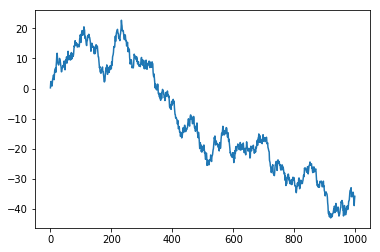

In [296]:
# 一维数据
data = pd.Series(np.random.randn(1000),index = np.arange(1000))
data = data.cumsum()
data.plot()
plt.show()

#### DataFrame

In [297]:
data = pd.DataFrame(np.random.randn(1000,4),
                   index = np.arange(1000),
                   columns = list("ABCD"))
data = data.cumsum()
print(data.head())

          A         B         C         D
0 -0.916460 -0.877230 -0.062718 -0.684141
1 -0.726254 -2.198079 -1.770869  0.192062
2 -0.193334 -1.872365 -1.963494 -0.044388
3  0.726127 -1.599891 -3.013247 -0.513544
4  0.056563 -3.127251 -2.426561  1.553729


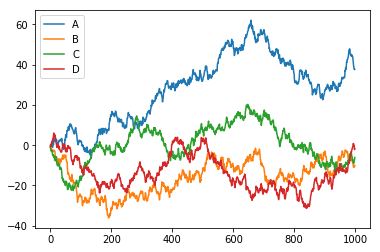

In [301]:
data.plot()  # color line 很多属性上网查
plt.show()

#### plot methods:  'bar','hist','box','kde','area','scatter','hexbin','pie'

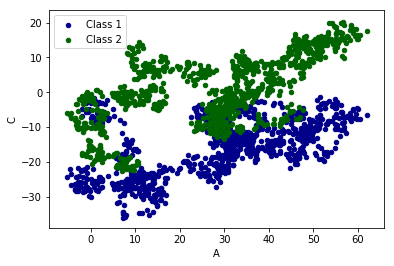

In [306]:
ax =data.plot.scatter(x='A',y='B',color='DarkBlue', label = 'Class 1')
data.plot.scatter(x='A',y = 'C',color = 'DarkGreen',label = 'Class 2',ax =ax)
plt.show()

# 未完待续